In [1]:
import pandas as pd

# Load the Excel file
file_path = "Amazon case study.xlsx"  # Make sure to upload this file to Colab
df = pd.read_excel(file_path, sheet_name='amazon')

# Copy for cleaning
df_clean = df.copy()
# Convert to proper data types
df_clean['actual_price'] = pd.to_numeric(df_clean['actual_price'], errors='coerce')
df_clean['discounted_price'] = pd.to_numeric(df_clean['discounted_price'], errors='coerce')
df_clean['discount_percentage'] = pd.to_numeric(df_clean['discount_percentage'], errors='coerce')
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')
df_clean['rating_count'] = pd.to_numeric(df_clean['rating_count'], errors='coerce')

# Clean column names
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove duplicates
df_clean.drop_duplicates(inplace=True)

# Drop rows missing key data
df_clean.dropna(subset=['product_id', 'product_name', 'category', 'discounted_price'], inplace=True)

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Save cleaned data to Excel
output_path = "amazon_cleaned_data.xlsx"
df_clean.to_excel(output_path, index=False)

print("✅ Data cleaned and saved as:", output_path)


✅ Data cleaned and saved as: amazon_cleaned_data.xlsx


Downloading...

In [ ]:
from google.colab import files
files.download("amazon_cleaned_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_excel("amazon_cleaned_data.xlsx")

# Create extra analysis columns
df['revenue'] = df['actual_price'] * df['rating_count']
df['price_bucket'] = pd.cut(df['actual_price'], bins=[0, 200, 500, df['actual_price'].max()],
                            labels=['<₹200', '₹200–₹500', '>₹500'])

# Normalized metrics for combined score
df['norm_rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
df['norm_reviews'] = (df['rating_count'] - df['rating_count'].min()) / (df['rating_count'].max() - df['rating_count'].min())
df['combined_score'] = df['norm_rating'] + df['norm_reviews']

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [9]:
# Use only the first 30 rows
df = pd.read_excel("amazon_cleaned_data.xlsx").head(30)

# Recalculate derived fields on this subset
df['revenue'] = df['actual_price'] * df['rating_count']
df['price_bucket'] = pd.cut(df['actual_price'], bins=[0, 200, 500, df['actual_price'].max()],
                            labels=['<₹200', '₹200–₹500', '>₹500'])
df['norm_rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
df['norm_reviews'] = (df['rating_count'] - df['rating_count'].min()) / (df['rating_count'].max() - df['rating_count'].min())
df['combined_score'] = df['norm_rating'] + df['norm_reviews']


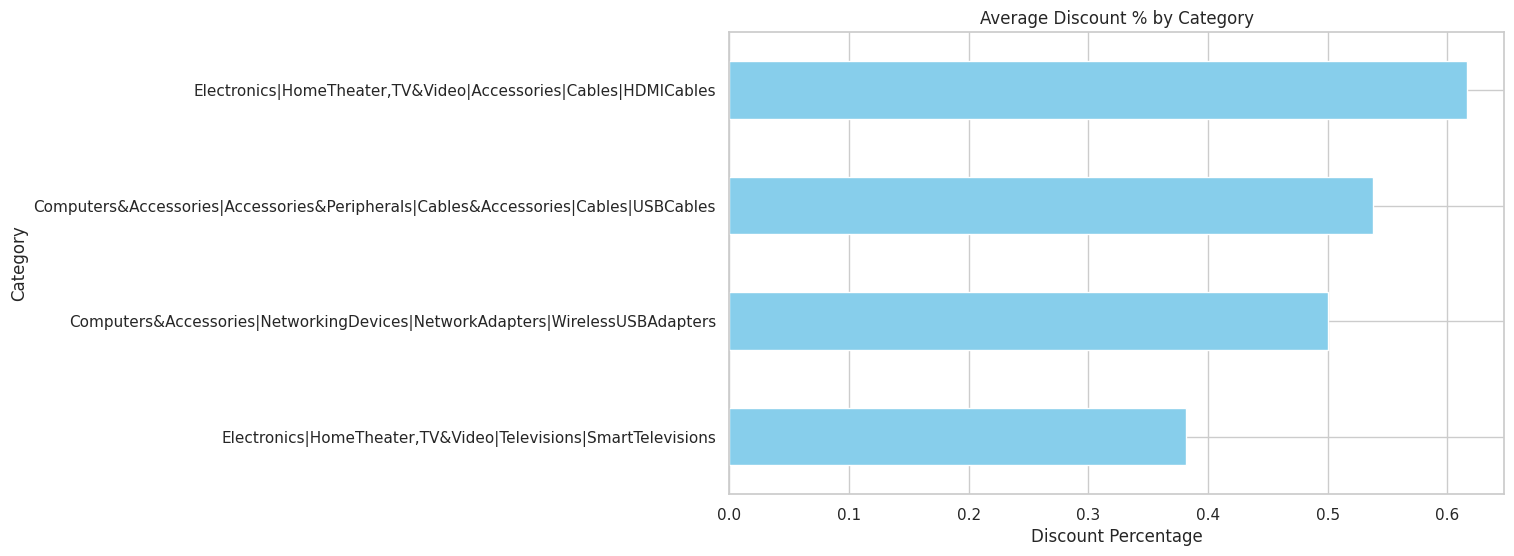

In [10]:
avg_discount = df.groupby('category')['discount_percentage'].mean().sort_values()
avg_discount.plot(kind='barh', color='skyblue')
plt.title("Average Discount % by Category")
plt.xlabel("Discount Percentage")
plt.ylabel("Category")
plt.show()


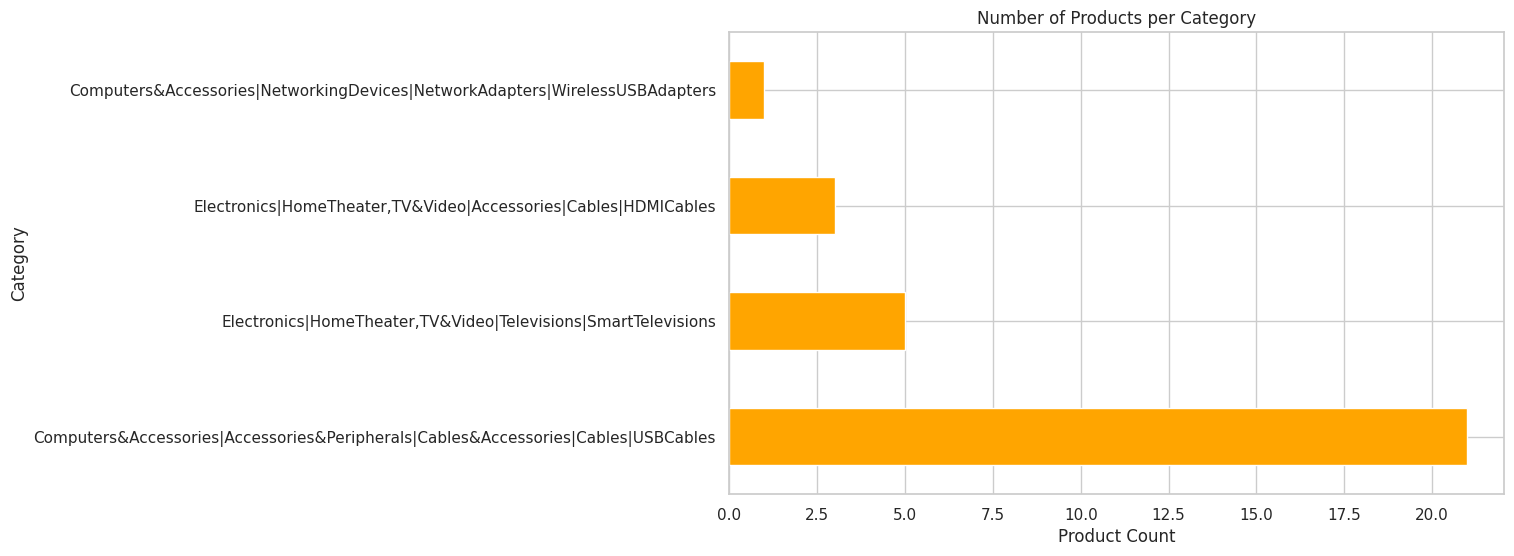

In [11]:
product_count = df['category'].value_counts()
product_count.plot(kind='barh', color='orange')
plt.title("Number of Products per Category")
plt.xlabel("Product Count")
plt.ylabel("Category")
plt.show()


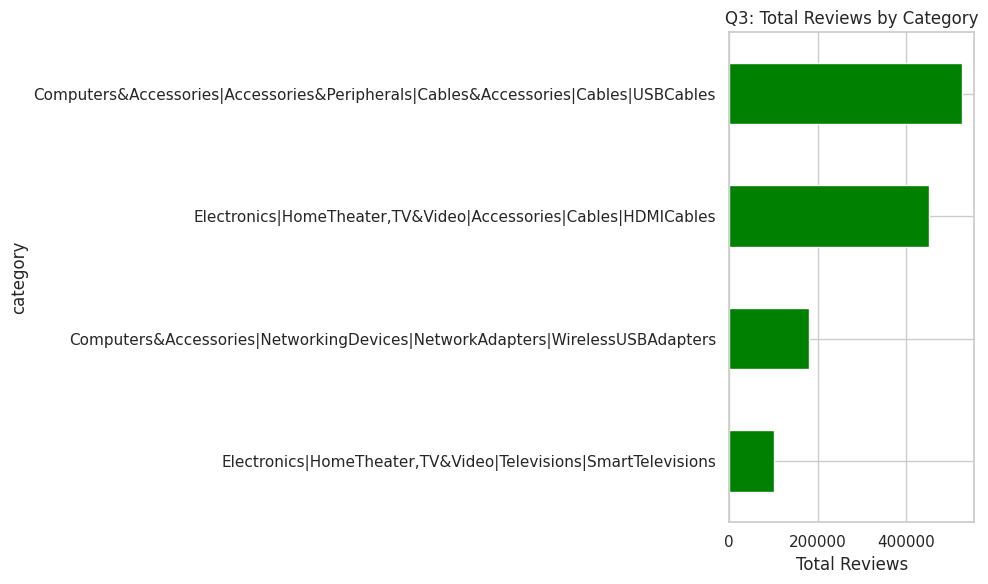

In [12]:
df.groupby('category')['rating_count'].sum().sort_values().plot(kind='barh', color='green')
plt.title("Q3: Total Reviews by Category")
plt.xlabel("Total Reviews")
plt.tight_layout()
plt.show()


/tmp/ipython-input-13-3375274887.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


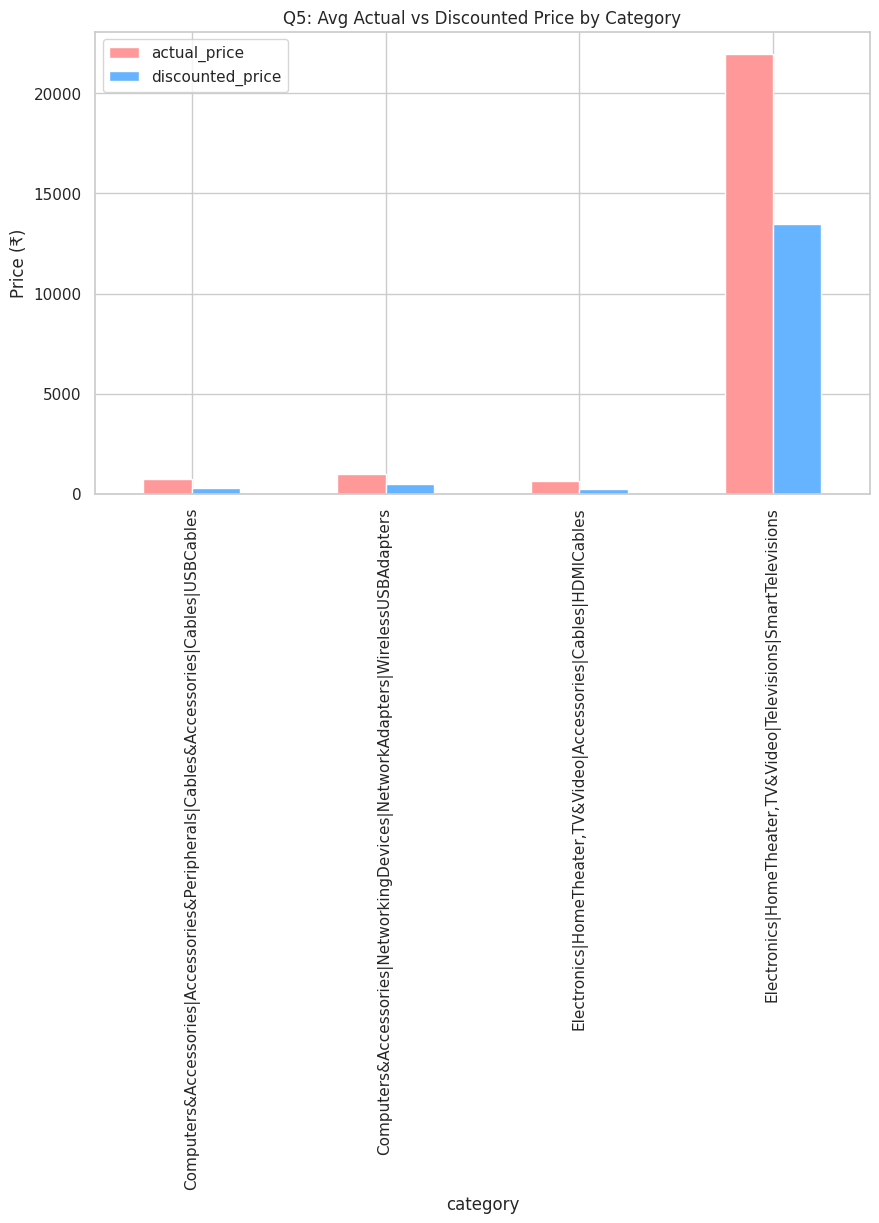

In [13]:
avg_prices = df.groupby('category')[['actual_price', 'discounted_price']].mean()
avg_prices.plot(kind='bar', color=['#ff9999','#66b3ff'])
plt.title("Q5: Avg Actual vs Discounted Price by Category")
plt.ylabel("Price (₹)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-15-1884872160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='product_name', x='rating_count', data=top_reviewed, palette='Greens_d')
/tmp/ipython-input-15-1884872160.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


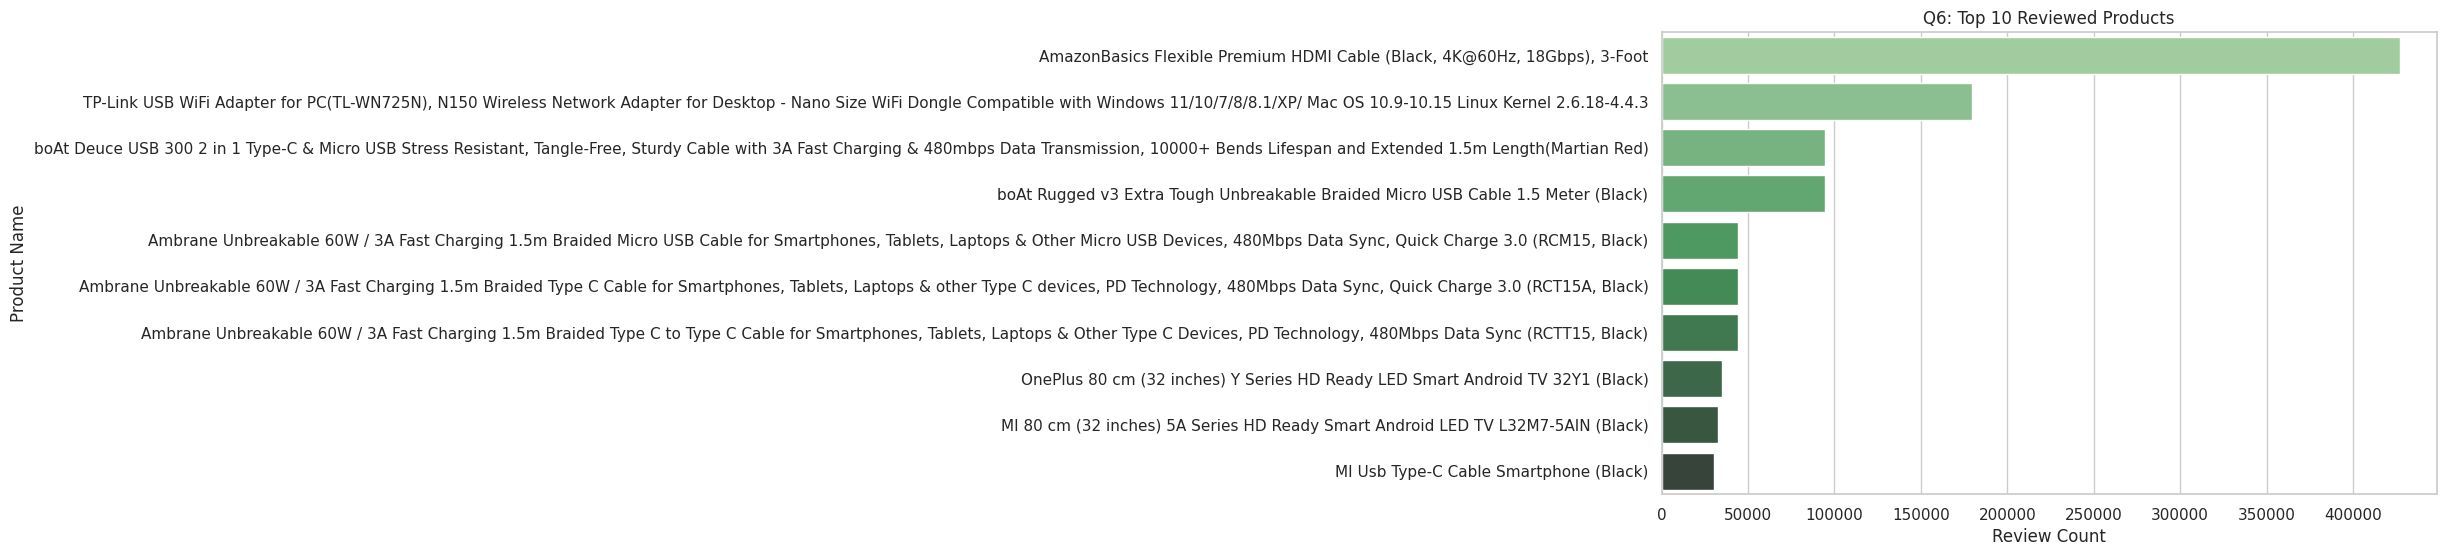

In [15]:
top_reviewed = df[['product_name', 'rating_count']].drop_duplicates().sort_values(by='rating_count', ascending=False).head(10)
sns.barplot(y='product_name', x='rating_count', data=top_reviewed, palette='Greens_d')
plt.title("Q6: Top 10 Reviewed Products")
plt.xlabel("Review Count")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


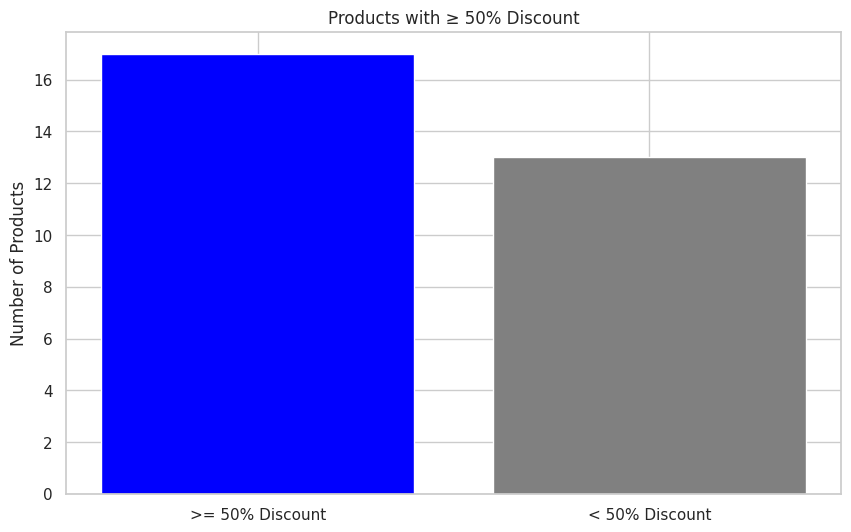

In [16]:
count_50_discount = df[df['discount_percentage'] >= 0.5].shape[0]
plt.bar(['>= 50% Discount', '< 50% Discount'], [count_50_discount, len(df) - count_50_discount], color=['blue', 'gray'])
plt.title("Products with ≥ 50% Discount")
plt.ylabel("Number of Products")
plt.show()


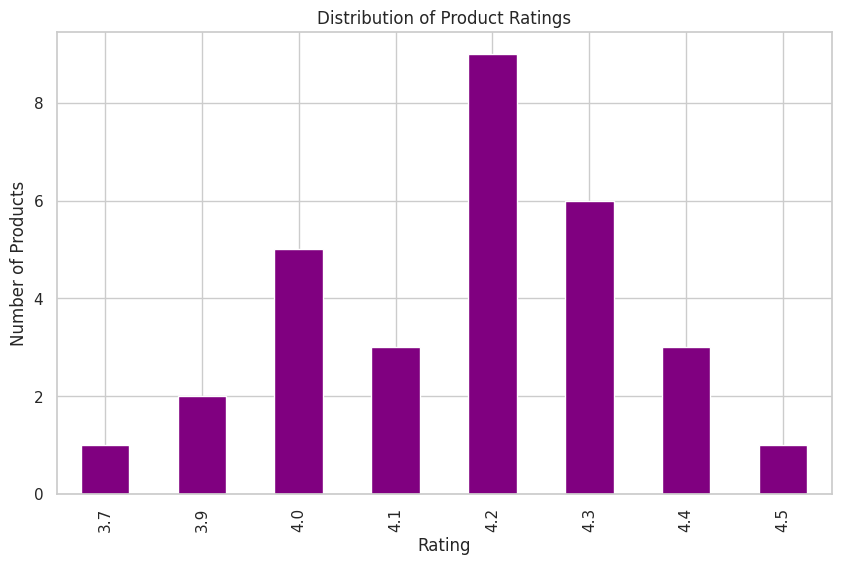

In [17]:
rating_dist = df['rating'].value_counts().sort_index()
rating_dist.plot(kind='bar', color='purple')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Products")
plt.show()


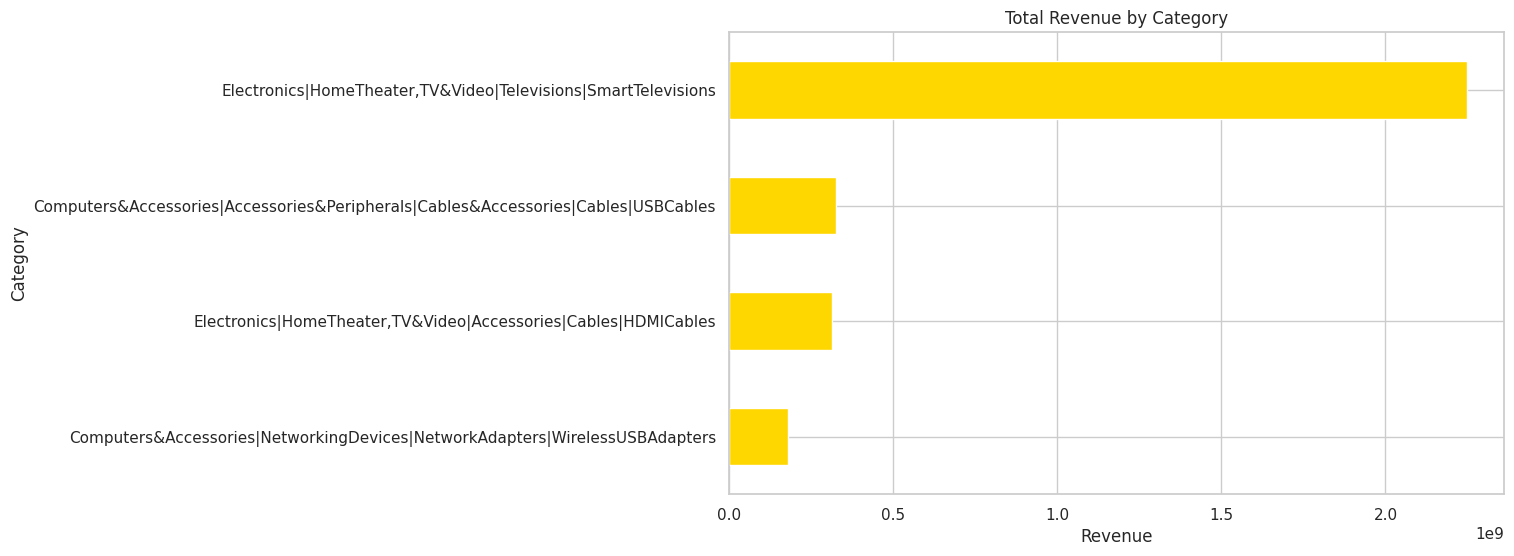

In [18]:
revenue_by_category = df.groupby('category')['revenue'].sum().sort_values()
revenue_by_category.plot(kind='barh', color='gold')
plt.title("Total Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()


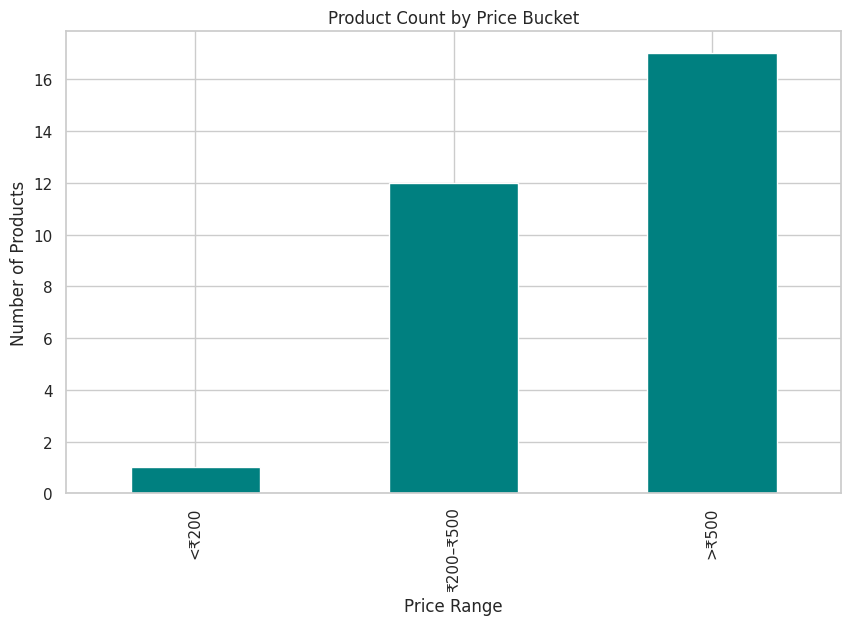

In [19]:
price_bucket_count = df['price_bucket'].value_counts().sort_index()
price_bucket_count.plot(kind='bar', color='teal')
plt.title("Product Count by Price Bucket")
plt.xlabel("Price Range")
plt.ylabel("Number of Products")
plt.show()


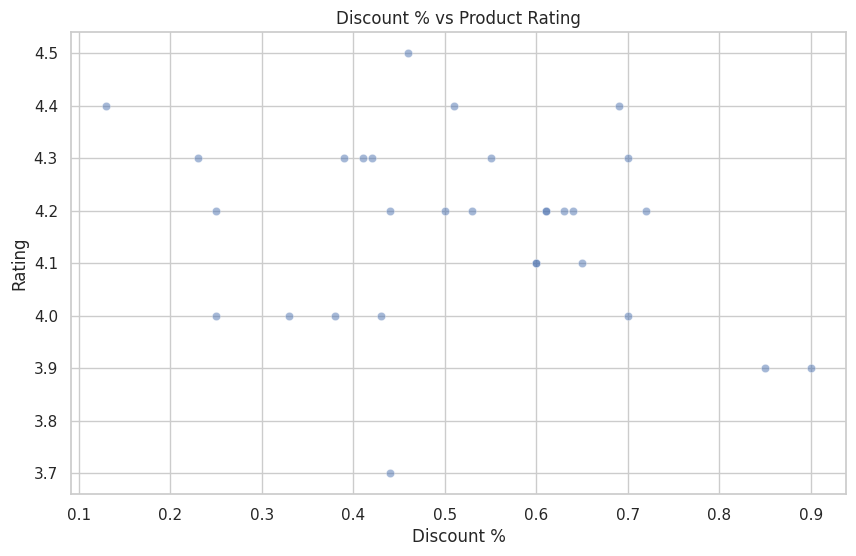

Correlation between discount and rating: -0.22


In [20]:
sns.scatterplot(data=df, x='discount_percentage', y='rating', alpha=0.5)
plt.title("Discount % vs Product Rating")
plt.xlabel("Discount %")
plt.ylabel("Rating")
plt.show()

correlation = df['rating'].corr(df['discount_percentage'])
print("Correlation between discount and rating:", round(correlation, 2))


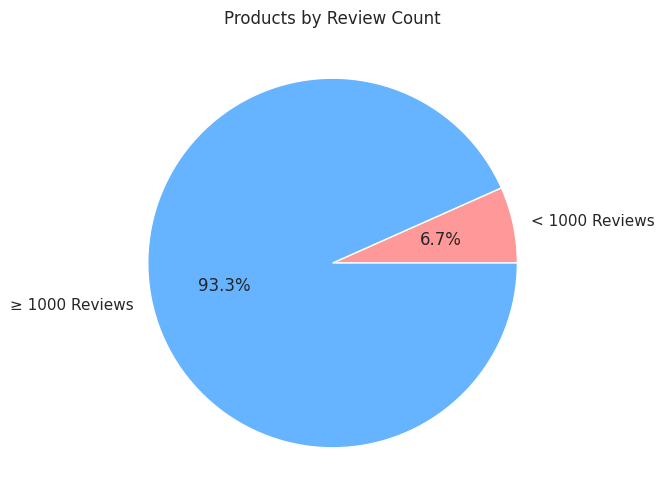

In [21]:
below_1000 = df[df['rating_count'] < 1000].shape[0]
above_1000 = len(df) - below_1000

plt.pie([below_1000, above_1000], labels=['< 1000 Reviews', '≥ 1000 Reviews'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Products by Review Count")
plt.show()


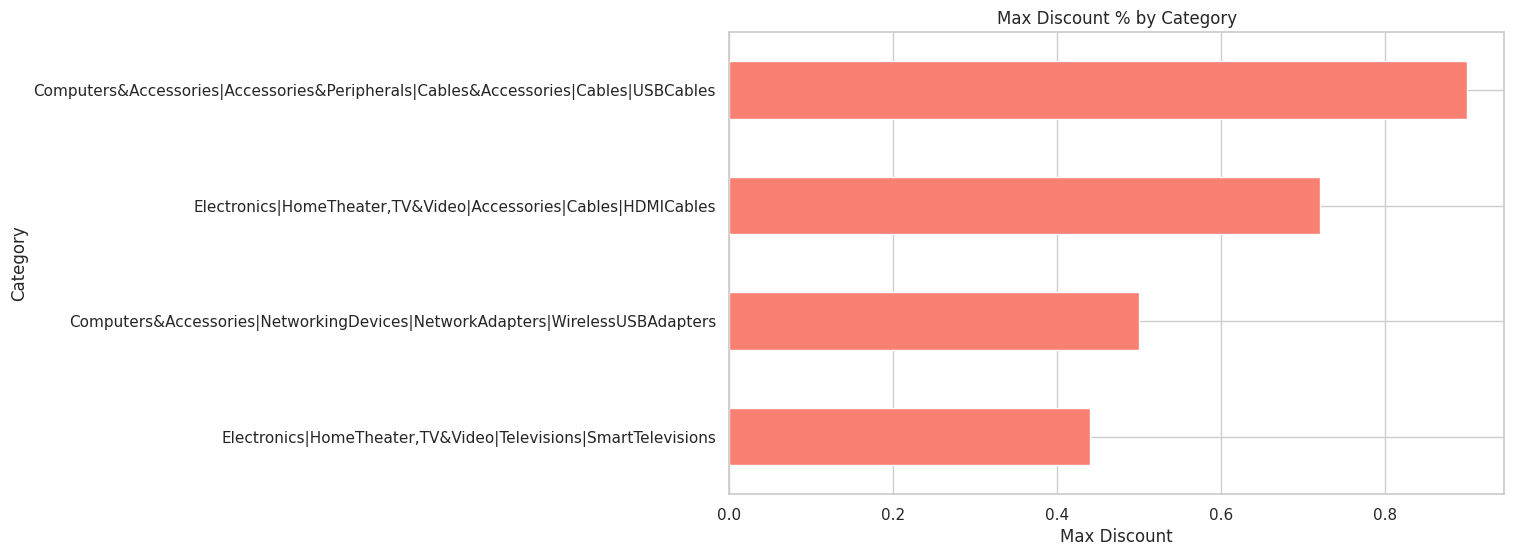

In [22]:
max_discounts = df.groupby('category')['discount_percentage'].max().sort_values()
max_discounts.plot(kind='barh', color='salmon')
plt.title("Max Discount % by Category")
plt.xlabel("Max Discount")
plt.ylabel("Category")
plt.show()


/tmp/ipython-input-23-3162746309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combined, y='product_name', x='combined_score', palette='coolwarm')


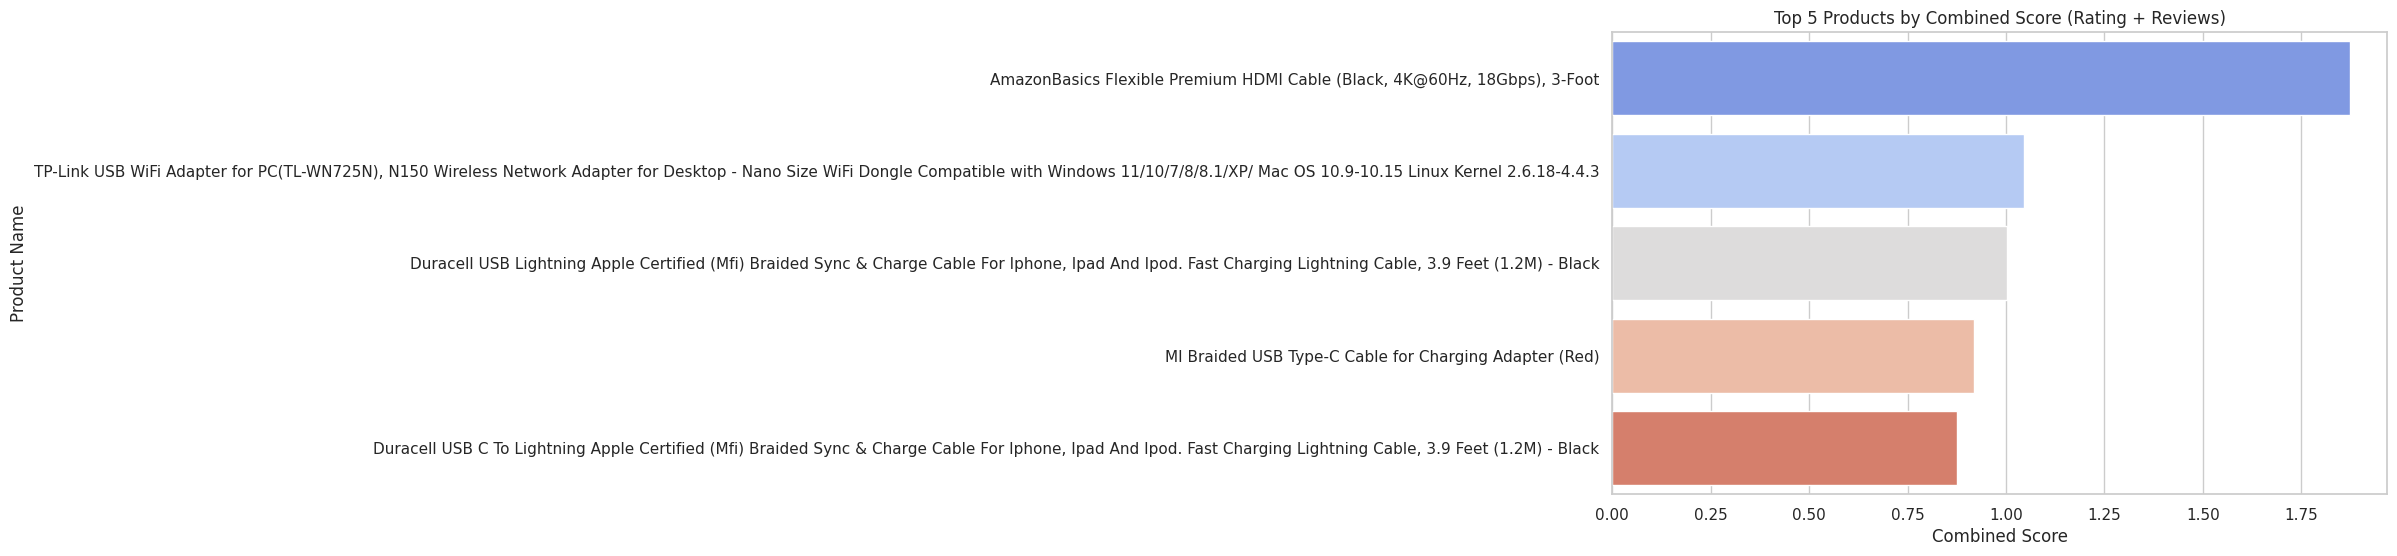

In [23]:
df['norm_rating'] = (df['rating'] - df['rating'].min()) / (df['rating'].max() - df['rating'].min())
df['norm_reviews'] = (df['rating_count'] - df['rating_count'].min()) / (df['rating_count'].max() - df['rating_count'].min())
df['combined_score'] = df['norm_rating'] + df['norm_reviews']

top_combined = df[['product_name', 'combined_score']].drop_duplicates().sort_values(by='combined_score', ascending=False).head(5)
sns.barplot(data=top_combined, y='product_name', x='combined_score', palette='coolwarm')
plt.title("Top 5 Products by Combined Score (Rating + Reviews)")
plt.xlabel("Combined Score")
plt.ylabel("Product Name")
plt.show()
